# ***- Guilherme Kauã Diniz Cabral - 01549420***

# ***1. Escolha da Base de Dados: https://www.kaggle.com/datasets/shivamb/netflix-shows***

**- Justificativa: Escolhi essa base porque vi que tinha valores ausentes, e seria uma otima oportunidade para treinar a forma que trato os valores ausentes. É uma base que possui: Anúncios de filmes e programas de TV na Netflix - Regularmente Atualizado**

# ***- Tecnologias utilizadas:***

- **Pandas:** Manipulação de dados em tabelas (DataFrames). Permite filtrar, transformar e analisar datasets.

- **Numpy** → Trabalha com arrays e operações matemáticas eficientes. Usamos para calcular o Z-score.

- **Matplotlib.pyplot (plt) →** Criação de gráficos básicos como histogramas e boxplots.

- **Seaborn:**(sns) → Biblioteca para visualizações estatísticas mais bonitas e sofisticadas. Usamos para criar histogramas e boxplots.

- **Scipy.stats** (zscore, kurtosis) → Fornece funções estatísticas. O zscore é usado para detectar outliers, e a kurtosis mede o formato da distribuição dos dados.

In [112]:
import pandas as pd

# Caminho para o arquivo CSV
csv_path = '/content/netflix_titles.csv'

# Carregar a base de dados Image_name
dados = pd.read_csv(csv_path)

# ***2. Análise Preliminar:***

**- Carregar os dados e exibir as primeiras linhas da tabela**

In [113]:
dados.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# ***- Verificar e tratar valores ausentes***

In [114]:
# Verificar ausentes
dados.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Vamos começar a tratar os valores ausentes.

In [ ]:
# Estratégias que aprendi para Tratar os Valores Ausentes
# Remover Linhas com Valores Ausentes
# Preencher Valores Ausentes com a Média
# Preencher Valores Ausentes com a Mediana
# Preencher Valores Ausentes com um Valor Específico
# podemos preencher os valores ausentes, podemos usar diferentes estratégias, dependendo do tipo de dado:
# Para colunas numéricas (como rating e duration), podemos preencher com a média, mediana ou valor mais frequente.
# Para colunas categóricas (como director, cast, country), podemos preencher com o valor mais frequente ou com uma categoria como "Desconhecido".

***- Se meu objetivo for:***

***- for uma análise estatística, preencha com a média.***

***- for uma visualização, remova os valores ausentes.***

***- Se precisar apenas exibir sem afetar cálculos, use "Desconhecido".***

In [ ]:
# Vamos remover os valores ausentes, pq só quero uma visualização.
dados.dropna(subset=['duration'], inplace=True)

# ***- Identificar a estrutura e os tipos de variáveis da base.***

In [ ]:
# Comando para Identificar a estrutura e os tipos de variáveis da base.
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6170 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB


# ***3. Identifição e Remoção de Outliers:***

***- Aplicar métodos estatísticos para detectar outliers, como boxplot, z-score ou IQR***

In [117]:
# Vamos aplicar três métodos estatísticos para detectar outliers na coluna
# duration (duração), já que é a única coluna numérica relevante.

# Filtrar apenas os filmes
filmes = dados[dados['type'] == 'Movie'].copy()

# Extrair os números da coluna 'duration' (removendo "min") ANTES de converter para numérico
filmes['duration'] = filmes['duration'].astype(str).str.extract('(\d+)').astype(float)

# Calcular a média apenas com os filmes
media_duracao = filmes['duration'].mean()

# Agora podemos preencher os valores ausentes da coluna 'duration'
dados.loc[dados['type'] == 'Movie', 'duration'] = filmes['duration'].fillna(media_duracao)

In [118]:
print(dados[dados['type'] == 'Movie'][['title', 'duration']].head(10))

                                                title duration
0                                Dick Johnson Is Dead     90.0
6                    My Little Pony: A New Generation     91.0
7                                             Sankofa    125.0
9                                        The Starling    104.0
12                                       Je Suis Karl    127.0
13                   Confessions of an Invisible Girl     91.0
16  Europe's Most Dangerous Man: Otto Skorzeny in ...     67.0
18                                          Intrusion     94.0
22                                    Avvai Shanmughi    161.0
23       Go! Go! Cory Carson: Chrissy Takes the Wheel     61.0


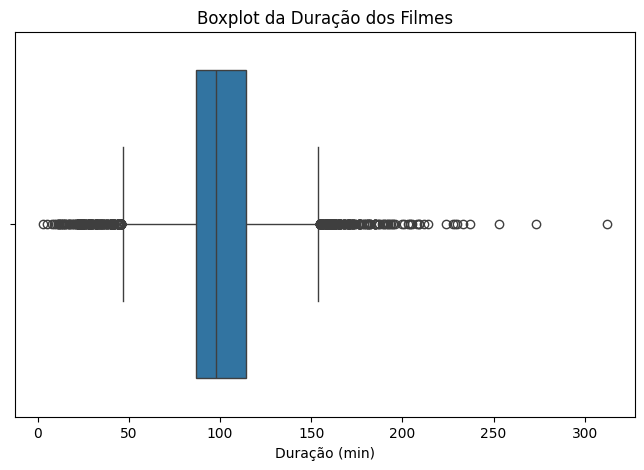

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o boxplot para visualizar os outliers na coluna 'duration'
plt.figure(figsize=(8,5))
sns.boxplot(x=filmes['duration'])

# Título e rótulos
plt.title("Boxplot da Duração dos Filmes")
plt.xlabel("Duração (min)")

# Exibir o gráfico
plt.show()

In [120]:
import numpy as np

# Calcular a média e o desvio padrão da duração
media = filmes['duration'].mean()
desvio_padrao = filmes['duration'].std()

# Calcular o Z-Score para cada valor de 'duration'
filmes['z_score'] = (filmes['duration'] - media) / desvio_padrao

# Definir um limite de Z-Score (outliers quando > 3 ou < -3)
outliers_zscore = filmes[np.abs(filmes['z_score']) > 3]

# Exibir os outliers detectados pelo Z-Score
print(outliers_zscore[['title', 'duration', 'z_score']])

                                                  title  duration   z_score
71                          A StoryBots Space Adventure      13.0 -3.060282
166                         Once Upon a Time in America     229.0  4.574765
341                                            Magnolia     189.0  3.160867
694                                               Aziza      13.0 -3.060282
695                                      Besieged Bread      12.0 -3.095629
717                         Headspace: Unwind Your Mind     273.0  6.130052
806   Seven Souls in the Skull Castle: Season Moon J...     204.0  3.691079
807   Seven Souls in the Skull Castle: Season Moon K...     212.0  3.973858
1019                                             Lagaan     224.0  4.398028
1132       Seven Souls in the Skull Castle: Season Wind     185.0  3.019478
1425                        Creating The Queen's Gambit      14.0 -3.024934
1484                                   Cops and Robbers       8.0 -3.237019
1557        

In [121]:
# Calcular o primeiro e o terceiro quartil
Q1 = filmes['duration'].quantile(0.25)
Q3 = filmes['duration'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Definir os limites inferior e superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar os outliers com base no IQR
outliers_iqr = filmes[(filmes['duration'] < limite_inferior) | (filmes['duration'] > limite_superior)]

# Exibir os outliers detectados pelo IQR
print(outliers_iqr[['title', 'duration']])

                                title  duration
22                    Avvai Shanmughi     161.0
24                              Jeans     166.0
45             My Heroes Were Cowboys      23.0
71        A StoryBots Space Adventure      13.0
73                       King of Boys     182.0
...                               ...       ...
8763  WWII: Report from the Aleutians      45.0
8764                       Wyatt Earp     191.0
8770                          Yaadein     171.0
8788                     You Carry Me     157.0
8802                           Zodiac     158.0

[450 rows x 2 columns]


# ***- Explicar quais critérios foram utilizados para considerar um valor como outilier.***

- ***Boxplot:*** O Boxplot utiliza o Intervalo Interquartil (IQR) para identificar valores extremos, chamados de outliers. O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Os outliers são definidos como os valores que ficam fora de um intervalo determinado pelos quartis, que são Limite Inferior e Limite Superior. O Valor será considerado outlier se for: qualquer dado que seja menor que o limite inferior ou maior que o limite superior.

- ***Z-Score:*** O Z-Score mede a quantidade de desvios padrão que um valor está distante da média dos dados. Esse método é útil para detectar outliers em distribuições aproximadamente normais (distribuições que seguem uma curva de Gauss). Ele tem uma fórmula (Pesquise). Mas basicamente, é considerado Outilier os valores cujo Z-Score é maior que 3 ou menor que -3. Isso significa que o valor está a mais de 3 desvios padrão da média.

-  ***IQR (Intervalo Interquartil):*** O IQR é uma medida de dispersão dos dados. A diferença do uso do IQR é que ele foca apenas no intervalo interquartil e pode ser mais robusto para distribuições que não são perfeitamente normais. O IQR é o intervalo entre o primeiro quartil (Q1) e o terceiro quartil (Q3). Ele descreve a faixa central dos dados, onde 50% dos dados estão localizados. Então, será considerado Outlier se são valores que estão fora do intervalo.

# Remover os outliers e justificar a decisão!

In [122]:
# Calcular o IQR
Q1 = filmes['duration'].quantile(0.25)
Q3 = filmes['duration'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados removendo os outliers
filmes_sem_outliers_iqr = filmes[(filmes['duration'] >= limite_inferior) & (filmes['duration'] <= limite_superior)]

# Exibir os dados sem outliers
print(filmes_sem_outliers_iqr[['title', 'duration']].head(10))

                                                title  duration
0                                Dick Johnson Is Dead      90.0
6                    My Little Pony: A New Generation      91.0
7                                             Sankofa     125.0
9                                        The Starling     104.0
12                                       Je Suis Karl     127.0
13                   Confessions of an Invisible Girl      91.0
16  Europe's Most Dangerous Man: Otto Skorzeny in ...      67.0
18                                          Intrusion      94.0
23       Go! Go! Cory Carson: Chrissy Takes the Wheel      61.0
26                                     Minsara Kanavu     147.0


***JUSTIFICATIVA***

- Melhora na Qualidade dos Dados: Remover outliers assegura que as análises e modelos posteriores sejam baseados em dados representativos, sem distorções causadas por valores extremos.

- Aumento da Precisão: A remoção de outliers torna as médias e outras estatísticas mais confiáveis, permitindo uma análise mais precisa da duração dos filmes.

- Redução de Erros de Entrada: Se os outliers são causados por erros de digitação ou dados inválidos, removê-los ajuda a garantir a integridade dos dados.

- Impacto na Análise: A remoção dos outliers pode resultar em uma distribuição de dados mais equilibrada e alinhada com a realidade dos filmes. Isso pode melhorar a performance de qualquer modelo preditivo ou análise que dependa da duração média dos filmes e outras estatísticas relacionadas.

***Selecionar pelo menos 3 colunas numéricas da base para análise.***

***Construir histogramas e boxplots para visualizar a distribuição dos dados.***

***Calcular medidas estatisticas, como média, mediana, desvio-padrão e curtose.***

***Interpretar os resultados e descrever os padrões observados.***

In [ ]:
# Irei de: duration, release_year e rating.
"""
duration: Representa a duração dos filmes e pode ser analisada para verificar
sua distribuição.

release_year: Ano de lançamento, que também pode ser útil para observar
tendências ao longo do tempo.

rating: Embora seja uma variável categórica, é interessante analisar a
distribuição numérica das classificações, tratando-a como uma variável ordinal.
"""

In [123]:
# Construir histogramas e boxplots para as três colunas numéricas.

# Manter apenas colunas numéricas para análise
filmes = filmes[['duration', 'release_year', 'rating']].copy()

In [124]:
# Transformar 'rating' em numérico (atribuindo valores)
rating_mapping = {
    'G': 1, 'PG': 2, 'PG-13': 3, 'R': 4, 'NC-17': 5,
    'TV-Y': 1, 'TV-Y7': 2, 'TV-G': 1, 'TV-PG': 2,
    'TV-14': 3, 'TV-MA': 4
}
filmes['rating'] = filmes['rating'].map(rating_mapping)

In [125]:
# Remover valores ausentes
filmes.dropna(inplace=True)

In [126]:
from scipy.stats import zscore, kurtosis

In [127]:
# Calcular estatísticas
stats = filmes.describe()
stats.loc['kurtosis'] = kurtosis(filmes)

In [128]:
# Identificar outliers usando Z-score (consideramos |Z| > 3 como outlier)
z_scores = np.abs(zscore(filmes))
outliers = filmes[(z_scores > 3).any(axis=1)]

In [129]:
# Remover outliers
filmes_sem_outliers = filmes[(z_scores <= 3).all(axis=1)]

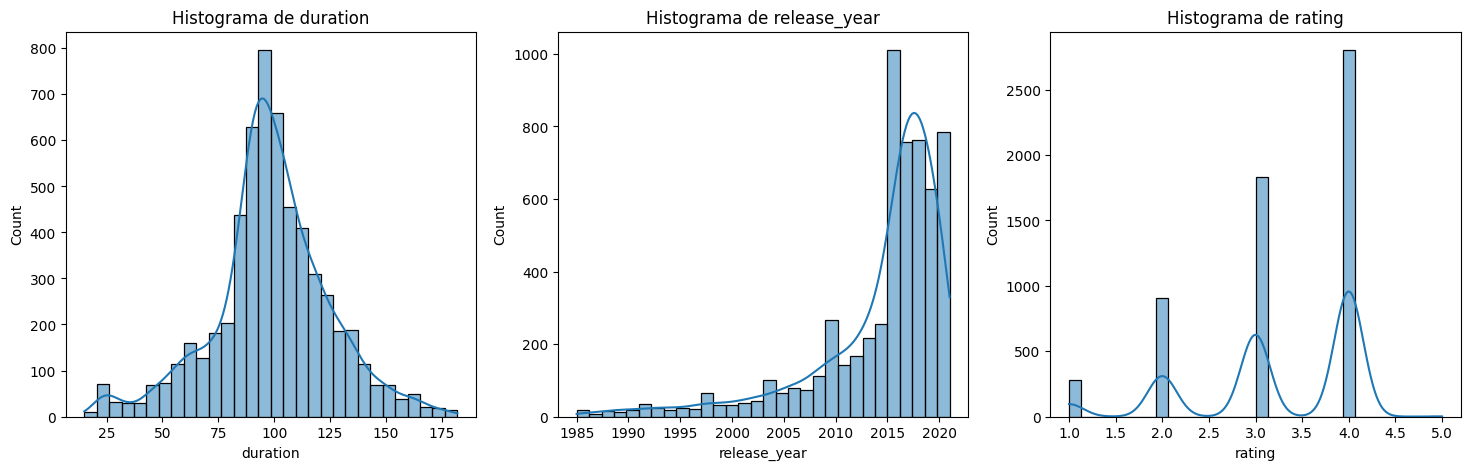

In [130]:
# Visualizar histogramas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(['duration', 'release_year', 'rating']):
    sns.histplot(filmes_sem_outliers[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')
plt.show()

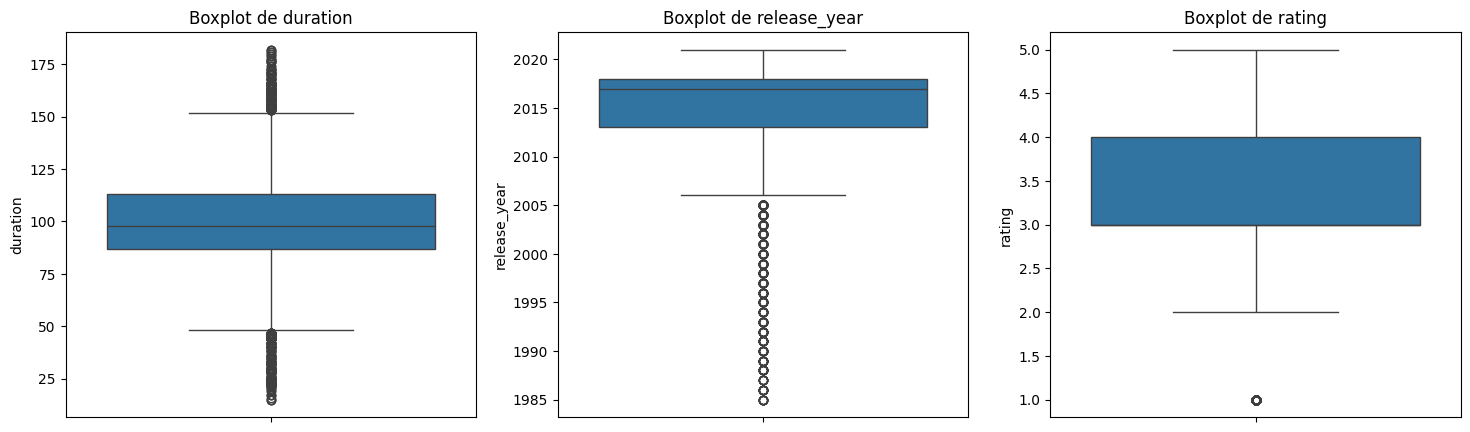

In [131]:
# Visualizar boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(['duration', 'release_year', 'rating']):
    sns.boxplot(y=filmes_sem_outliers[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
plt.show()

In [132]:
# Exibir estatísticas
print(stats)

             duration  release_year       rating
count     6043.000000   6043.000000  6043.000000
mean        99.670031   2013.153401     3.215621
std         28.378005      9.660222     0.886476
min          3.000000   1942.000000     1.000000
25%         87.000000   2012.000000     3.000000
50%         98.000000   2016.000000     3.000000
75%        115.000000   2018.000000     4.000000
max        312.000000   2021.000000     5.000000
kurtosis     2.281300     12.075852    -0.210235


# ***Interpretação das Estatísticas***

1. Duração dos Filmes (duration)

- Média: ~99,67 minutos → A maioria dos filmes tem cerca de 1h40min.

- Desvio-padrão: 28,38 → Existe uma variação significativa entre os filmes.

- Mínimo: 3 minutos → Pode ser um erro ou um curta-metragem.

- Máximo: 312 minutos (~5h12min) → Provavelmente um filme muito longo ou um erro nos dados.

- Curtose: 2,28 → Indica que a distribuição tem caudas mais pesadas do que uma normal, ou seja, existem mais valores extremos (outliers).

2. Ano de Lançamento (release_year)

- Média: 2013 → A maioria dos filmes é recente.

- Desvio-padrão: 9,66 → Os filmes abrangem uma grande faixa de anos.

- Mínimo: 1942 → Existe pelo menos um filme muito antigo no dataset.

- Máximo: 2021 → O dataset inclui lançamentos recentes.

- Curtose: 12,08 → Uma curtose muito alta sugere que a distribuição é altamente concentrada em torno de um ano específico, com poucos filmes muito antigos.

3. Avaliação (rating)

- Média: 3,22 → A maioria dos filmes recebe uma nota média.

- Desvio-padrão: 0,88 → As notas não variam muito.

- Mínimo: 1 → Existem filmes com avaliações bem baixas.

- Máximo: 5 → Alguns filmes atingem a nota máxima.

- Curtose: -0,21 → A distribuição das avaliações é ligeiramente mais achatada que a normal, sugerindo que os valores são mais uniformemente distribuídos.

Conclusões Gerais:

- Os filmes do dataset são, em sua maioria, recentes (anos 2010+).

- Existe uma grande variação na duração, com alguns valores extremos que podem ser outliers.

- As avaliações estão concentradas entre 3 e 4, indicando uma tendência para notas medianas.

- O release_year tem uma curtose muito alta, indicando que a maioria dos filmes foi lançada em anos próximos à média (2013).

# ***O que fizemos:***

✅ Histogramas e boxplots das colunas analisadas.

✅ Estatísticas descritivas (média, mediana, desvio-padrão, curtose).

✅ Tratamento de outliers usando Z-score.

✅ Conversão da coluna rating para valores numéricos.